In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline


In [142]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()


y = 1, it's a 'cat' picture.


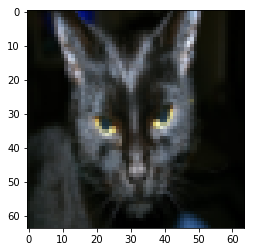

In [16]:
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [21]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
numpx = train_set_x_orig[0].shape[0]
print(str(m_train)+" "+str(m_test)+" "+str(numpx))

209 50 64


In [24]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_orig_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_orig_flatten / 255
print("train_set_x shape:" + str(train_set_x_flatten.shape))
print("test_set_x shape:" + str(test_set_x_orig_flatten.shape))


train_set_x shape:(12288, 209)
test_set_x shape:(12288, 50)


In [25]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [28]:
print("sigmoid([0, 2]: "+str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]: [ 0.5         0.88079708]


In [32]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    assert (w.shape == (dim, 1))
    assert (isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [33]:
dim = 4
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
b = 0


In [116]:

def propagate(w, b, X, Y):
    
    
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)            # compute activation
    cost = -1.0/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))         # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1.0/m * np.dot(X, (A - Y).T)
    db = 1.0/m * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [118]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[ 0.99993216]
 [ 1.99980262]]
db = 0.499935230625
cost = 6.00006477319


In [119]:
def optimization(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    costs = []
    for i in range(num_iterations):
        grads, cost= propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    paras = {"w" : w,
             "b" : b}
    grads = {"dw": dw,
             "db": db}
    return paras, grads, costs

            
        
            

In [120]:
params, grads, costs = optimization(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


w = [[ 0.1124579 ]
 [ 0.23106775]]
b = 1.55930492484
dw = [[ 0.90158428]
 [ 1.76250842]]
db = 0.430462071679


In [121]:
def predict (w, b ,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X)+b)
    for i in range(A.shape[1]):
        Y_prediction[0,i] = np.rint(A[0, i])
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [122]:
print("prediction = "+str(predict(params["w"], params["b"], X)))

In [123]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, 
          print_cost = True):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimization(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

        

In [129]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000,
          learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147


Cost after iteration 100: 0.657208


Cost after iteration 200: 0.634820


Cost after iteration 300: 0.618328


Cost after iteration 400: 0.605556


Cost after iteration 500: 0.595359


Cost after iteration 600: 0.587040


Cost after iteration 700: 0.580138


Cost after iteration 800: 0.574328


Cost after iteration 900: 0.569376


Cost after iteration 1000: 0.565110


Cost after iteration 1100: 0.561395


Cost after iteration 1200: 0.558131


Cost after iteration 1300: 0.555237


Cost after iteration 1400: 0.552651


Cost after iteration 1500: 0.550322


Cost after iteration 1600: 0.548211


Cost after iteration 1700: 0.546283


Cost after iteration 1800: 0.544514


Cost after iteration 1900: 0.542880


train accuracy: 72.7272727273 %
test accuracy: 42.0 %


In [143]:
index = 1
plt.imshow(test_set_x[:, index].reshape(numpx, numpx, 3))
print ("y = " + str(test_set_y[0, index]))
print(", you predicted that it is a \"" + classes[d["Y_prediction_train"][0,index]].decode("utf-8") +  "picture."")

SyntaxError: EOL while scanning string literal (<ipython-input-143-428556aa793b>, line 4)

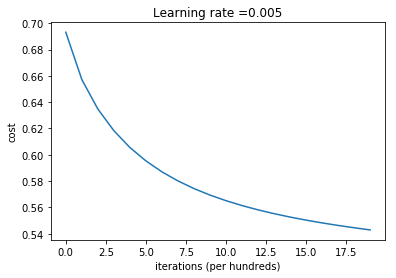

In [144]:
# Example of a picture that was wrongly classified.
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()